In [2]:
import pandas as pd
import numpy as np

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score, roc_curve
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [5]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/statlog/german/german.data'
column_names = ['Status of existing checking account', 'Duration in month', 'Credit history', 'Purpose', 'Credit amount',
                'Savings account/bonds', 'Present employment since', 'Installment rate in percentage of disposable income',
                'Personal status and sex', 'Other debtors / guarantors', 'Present residence since', 'Property',
                'Age in years', 'Other installment plans', 'Housing', 'Number of existing credits at this bank',
                'Job', 'Number of people being liable to provide maintenance for', 'Telephone', 'foreign worker', 'Target']

In [6]:
df = pd.read_csv(url, sep=' ', header=None, names=column_names)

In [7]:
df.head()

,Status of existing checking account,Duration in month,Credit history,Purpose,Credit amount,Savings account/bonds,Present employment since,Installment rate in percentage of disposable income,Personal status and sex,Other debtors / guarantors,...,Property,Age in years,Other installment plans,Housing,Number of existing credits at this bank,Job,Number of people being liable to provide maintenance for,Telephone,foreign worker,Target
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,...,A121,67,A143,A152,2,A173,1,A192,A201,1
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,...,A121,22,A143,A152,1,A173,1,A191,A201,2
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,...,A121,49,A143,A152,1,A172,2,A191,A201,1
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,...,A122,45,A143,A153,1,A173,2,A191,A201,1
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,...,A124,53,A143,A153,2,A173,2,A191,A201,2


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                                                    Non-Null Count  Dtype 
---  ------                                                    --------------  ----- 
 0   Status of existing checking account                       1000 non-null   object
 1   Duration in month                                         1000 non-null   int64 
 2   Credit history                                            1000 non-null   object
 3   Purpose                                                   1000 non-null   object
 4   Credit amount                                             1000 non-null   int64 
 5   Savings account/bonds                                     1000 non-null   object
 6   Present employment since                                  1000 non-null   object
 7   Installment rate in percentage of disposable income       1000 non-null   int64 
 8   Personal status and sex      

In [9]:
df.describe(include='all')

,Status of existing checking account,Duration in month,Credit history,Purpose,Credit amount,Savings account/bonds,Present employment since,Installment rate in percentage of disposable income,Personal status and sex,Other debtors / guarantors,...,Property,Age in years,Other installment plans,Housing,Number of existing credits at this bank,Job,Number of people being liable to provide maintenance for,Telephone,foreign worker,Target
count,1000,1000.000000,1000,1000,1000.000000,1000,1000,1000.000000,1000,1000,...,1000,1000.000000,1000,1000,1000.000000,1000,1000.000000,1000,1000,1000.000000
unique,4,NaN,5,10,NaN,5,5,NaN,4,3,...,4,NaN,3,3,NaN,4,NaN,2,2,NaN
top,A14,NaN,A32,A43,NaN,A61,A73,NaN,A93,A101,...,A123,NaN,A143,A152,NaN,A173,NaN,A191,A201,NaN
freq,394,NaN,530,280,NaN,603,339,NaN,548,907,...,332,NaN,814,713,NaN,630,NaN,596,963,NaN
mean,NaN,20.903000,NaN,NaN,3271.258000,NaN,NaN,2.973000,NaN,NaN,...,NaN,35.546000,NaN,NaN,1.407000,NaN,1.155000,NaN,NaN,1.300000
std,NaN,12.058814,NaN,NaN,2822.736876,NaN,NaN,1.118715,NaN,NaN,...,NaN,11.375469,NaN,NaN,0.577654,NaN,0.362086,NaN,NaN,0.458487
min,NaN,4.000000,NaN,NaN,250.000000,NaN,NaN,1.000000,NaN,NaN,...,NaN,19.000000,NaN,NaN,1.000000,NaN,1.000000,NaN,NaN,1.000000
25%,NaN,12.000000,NaN,NaN,1365.500000,NaN,NaN,2.000000,NaN,NaN,...,NaN,27.000000,NaN,NaN,1.000000,NaN,1.000000,NaN,NaN,1.000000
50%,NaN,18.000000,NaN,NaN,2319.500000,NaN,NaN,3.000000,NaN,NaN,...,NaN,33.000000,NaN,NaN,1.000000,NaN,1.000000,NaN,NaN,1.000000
75%,NaN,24.000000,NaN,NaN,3972.250000,NaN,NaN,4.000000,NaN,NaN,...,NaN,42.000000,NaN,NaN,2.000000,NaN,1.000000,NaN,NaN,2.000000


In [10]:
df = pd.get_dummies(df, drop_first=True)

In [11]:
df.head()

,Duration in month,Credit amount,Installment rate in percentage of disposable income,Present residence since,Age in years,Number of existing credits at this bank,Number of people being liable to provide maintenance for,Target,Status of existing checking account_A12,Status of existing checking account_A13,...,Property_A124,Other installment plans_A142,Other installment plans_A143,Housing_A152,Housing_A153,Job_A172,Job_A173,Job_A174,Telephone_A192,foreign worker_A202
0,6,1169,4,4,67,2,1,1,False,False,...,False,False,True,True,False,False,True,False,True,False
1,48,5951,2,2,22,1,1,2,True,False,...,False,False,True,True,False,False,True,False,False,False
2,12,2096,2,3,49,1,2,1,False,False,...,False,False,True,True,False,True,False,False,False,False
3,42,7882,2,4,45,1,2,1,False,False,...,False,False,True,False,True,False,True,False,False,False
4,24,4870,3,4,53,2,2,2,False,False,...,True,False,True,False,True,False,True,False,False,False


In [12]:
le = LabelEncoder()
df['Target'] = le.fit_transform(df['Target'])

In [13]:
X = df.drop('Target', axis=1)
y = df['Target']

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [15]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [20]:
rf_model = RandomForestClassifier(n_estimators=200, max_features='sqrt', max_depth=20, min_samples_split=5, min_samples_leaf=2, bootstrap=True, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(max_depth=20, min_samples_leaf=2, min_samples_split=5,
                       n_estimators=200, random_state=42)

In [21]:
cv = StratifiedKFold(n_splits=5, random_state=42, shuffle=True)
cv_scores = cross_val_score(rf_model, X_train, y_train, cv=cv, scoring='accuracy')
print("Cross-validation accuracy scores: ", cv_scores)
print("Mean cross-validation accuracy: ", np.mean(cv_scores))

Cross-validation accuracy scores:  [0.76428571 0.75714286 0.75714286 0.67857143 0.75      ]
Mean cross-validation accuracy:  0.7414285714285714


In [22]:
y_pred = rf_model.predict(X_test)

In [23]:
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Confusion Matrix:
[[201   9]
 [ 62  28]]


In [24]:
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.96      0.85       210
           1       0.76      0.31      0.44        90

    accuracy                           0.76       300
   macro avg       0.76      0.63      0.65       300
weighted avg       0.76      0.76      0.73       300



In [25]:
print("\nAccuracy Score:")
print(accuracy_score(y_test, y_pred))


Accuracy Score:
0.7633333333333333


In [26]:
y_prob = rf_model.predict_proba(X_test)[:, 1]
roc_auc = roc_auc_score(y_test, y_prob)
fpr, tpr, _ = roc_curve(y_test, y_prob)

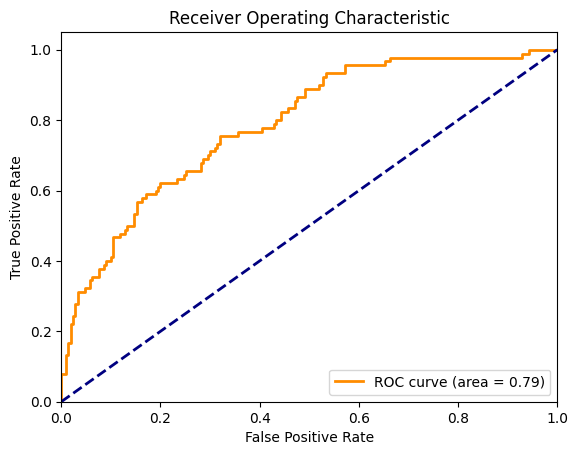

In [27]:
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [28]:
importances = rf_model.feature_importances_
std = np.std([tree.feature_importances_ for tree in rf_model.estimators_], axis=0)
indices = np.argsort(importances)[::-1]

In [29]:
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. feature %s (%f)" % (f + 1, X.columns[indices[f]], importances[indices[f]]))

Feature ranking:
1. feature Credit amount (0.120279)
2. feature Status of existing checking account_A14 (0.099302)
3. feature Duration in month (0.092838)
4. feature Age in years (0.083974)
5. feature Installment rate in percentage of disposable income (0.039461)
6. feature Present residence since (0.034201)
7. feature Other installment plans_A143 (0.028354)
8. feature Credit history_A34 (0.027919)
9. feature Housing_A152 (0.022493)
10. feature Status of existing checking account_A12 (0.021824)
11. feature Savings account/bonds_A65 (0.021334)
12. feature Property_A124 (0.020861)
13. feature Present employment since_A72 (0.020382)
14. feature Personal status and sex_A93 (0.019113)
15. feature Number of existing credits at this bank (0.018043)
16. feature Personal status and sex_A92 (0.018021)
17. feature Telephone_A192 (0.017433)
18. feature Job_A173 (0.017072)
19. feature Present employment since_A73 (0.016883)
20. feature Property_A123 (0.016832)
21. feature Credit history_A32 (0.0159

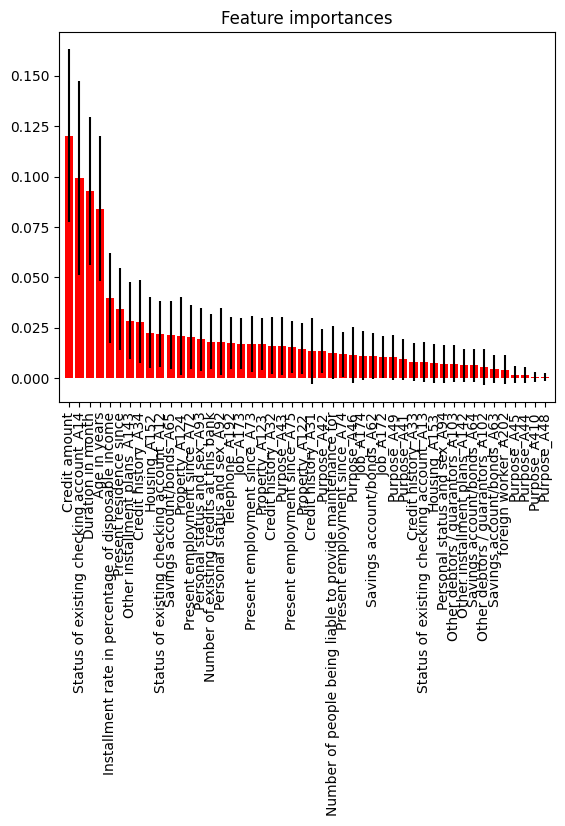

In [30]:
plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices], color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), X.columns[indices], rotation=90)
plt.xlim([-1, X.shape[1]])
plt.show()